In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
climate_df = pd.read_csv('data.csv')
print(climate_df)

     Category  temp_min  temp_max  rainfall
0        1901     23.03     30.40   2106.77
1        1902     22.98     30.34   2334.47
2        1903     22.99     30.35   2541.25
3        1904     23.01     30.37   2306.62
4        1905     23.04     30.40   2459.92
..        ...       ...       ...       ...
117      2018     24.01     31.73   2573.56
118      2019     24.38     32.05   1847.01
119      2020     24.26     31.84   2484.51
120      2021     24.07     31.50   3195.10
121      2022     23.89     31.58   2894.53

[122 rows x 4 columns]


In [3]:
climate_df.head()

,Category,temp_min,temp_max,rainfall
0,1901,23.03,30.40,2106.77
1,1902,22.98,30.34,2334.47
2,1903,22.99,30.35,2541.25
3,1904,23.01,30.37,2306.62
4,1905,23.04,30.40,2459.92


In [4]:
climate_df['rainfall'].describe()

count     122.000000
mean     2495.619098
std       328.392723
min      1687.020000
25%      2296.787500
50%      2496.535000
75%      2735.597500
max      3315.930000
Name: rainfall, dtype: float64

In [5]:
print(climate_df[pd.isnull(climate_df['rainfall'])])

Empty DataFrame
Columns: [Category, temp_min, temp_max, rainfall]
Index: []


Data Exploration

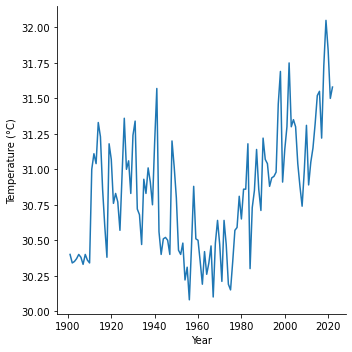

In [6]:
#exploration for maximum temperature
p = sns.relplot(x="Category", y = 'temp_max',
           data =climate_df, kind = "line")
plt.ylabel("Maximum temperature")
# Set the y-label with units
p.set_axis_labels("Year", "Temperature (°C)")

plt.show()

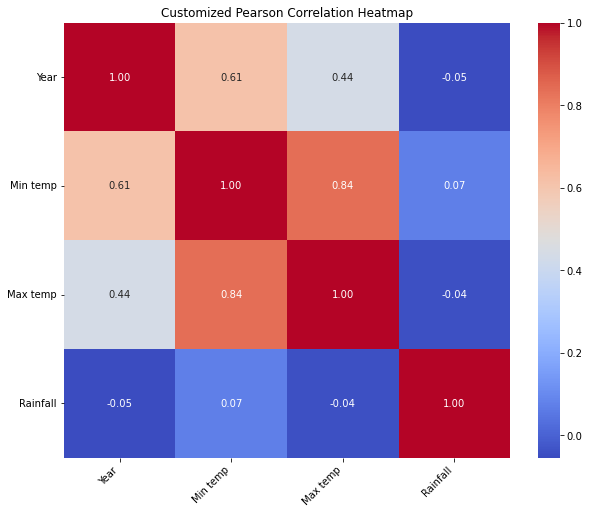

In [7]:
# Compute the Pearson correlation matrix 
corr_mat = climate_df.corr(method='pearson')

# Create a heatmap with annotations
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")

# Set new axis labels
new_labels = ["Year", "Min temp", "Max temp", "Rainfall"]
heatmap.set_xticklabels(new_labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(new_labels, rotation=0)

plt.title("Customized Pearson Correlation Heatmap")
plt.show()

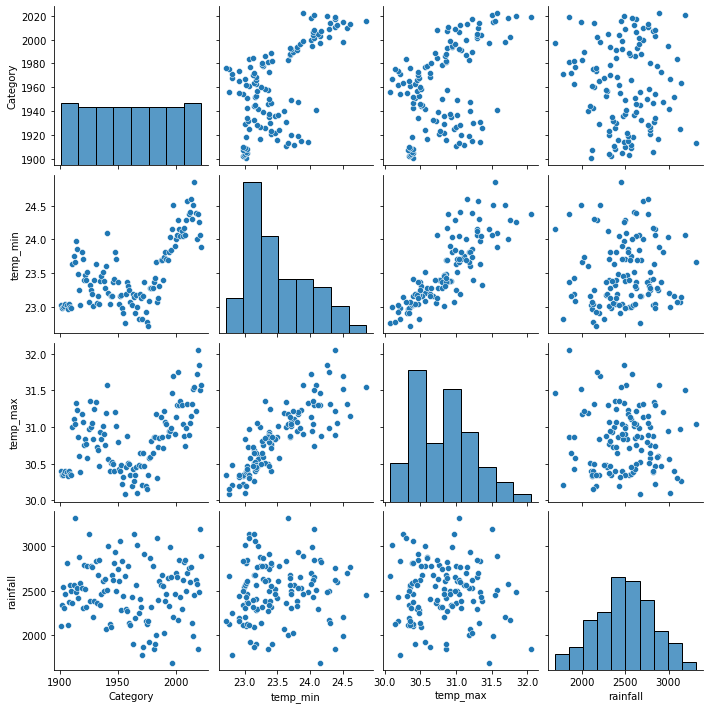

In [8]:
sns.pairplot(climate_df)

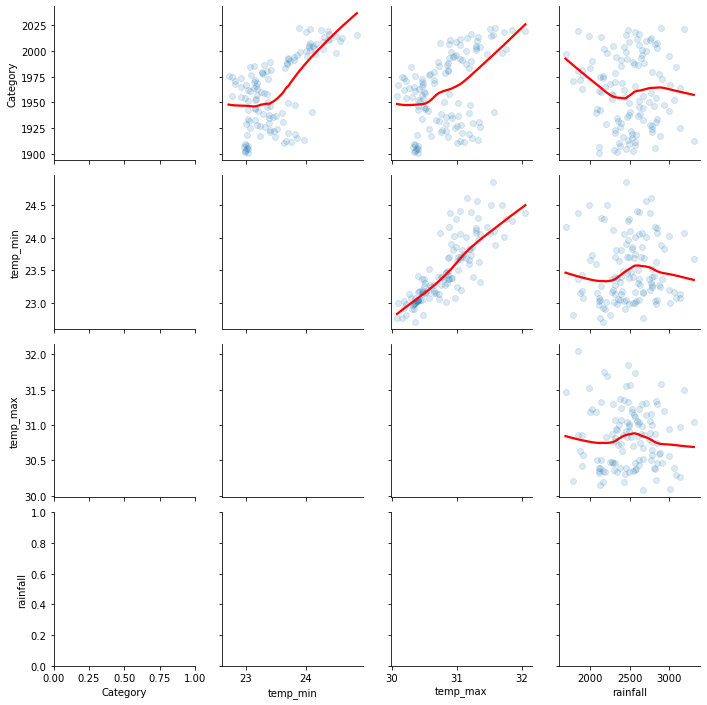

In [9]:
g = sns.PairGrid(climate_df)
g = g.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})

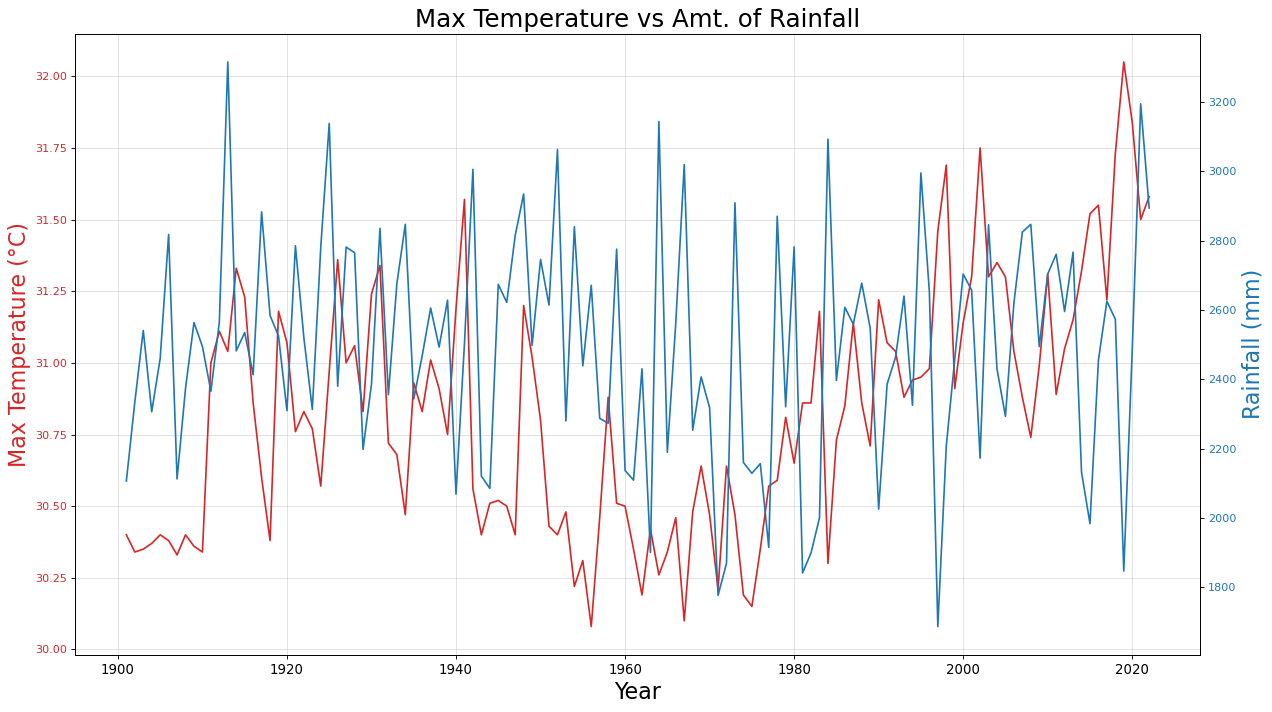

In [10]:
#secondary axis
#measures max temp vs rainfall over the years
x = climate_df['Category']
y1 = climate_df['temp_max']
y2 = climate_df['rainfall']

# Plot Line1 (Left Y Axis - Max Temperature)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Bar Plot2 (Right Y Axis - Rainfall)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Max Temperature (°C)', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel('Rainfall (mm)', color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Max Temperature vs Amt. of Rainfall", fontsize=22)
fig.tight_layout()
plt.show()

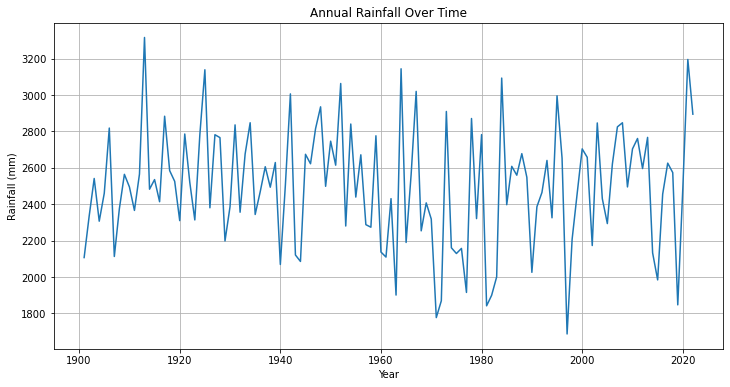

In [11]:
#Descriptive analysis 
plt.figure(figsize=(12, 6))
plt.plot(climate_df['Category'], climate_df['rainfall'])
plt.title('Annual Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

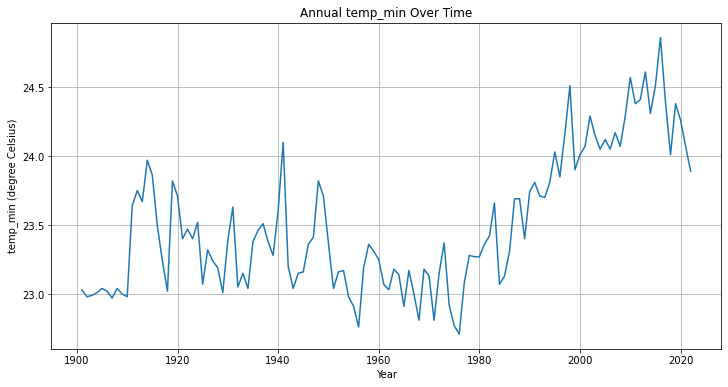

In [12]:
#exploratory data for minimum temperature
#Descriptive analysis
plt.figure(figsize=(12, 6))
plt.plot(climate_df['Category'], climate_df['temp_min'])
plt.title('Annual temp_min Over Time')
plt.xlabel('Year')
plt.ylabel('temp_min (degree Celsius)')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

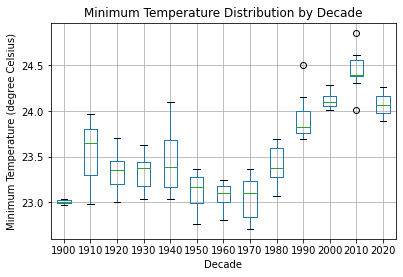

In [13]:
#Boxplot of rainfall by decade
climate_df['Decade'] = climate_df['Category'] // 10 * 10
plt.figure(figsize=(10, 6))
climate_df.boxplot(column='temp_min', by='Decade')
plt.title('Minimum Temperature Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Minimum Temperature (degree Celsius)')
plt.suptitle('')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

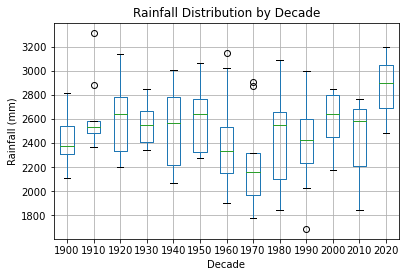

In [14]:
#Boxplot of rainfall by decade
climate_df['Decade'] = climate_df['Category'] // 10 * 10
plt.figure(figsize=(10, 6))
climate_df.boxplot(column='rainfall', by='Decade')
plt.title('Rainfall Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Rainfall (mm)')
plt.suptitle('')
plt.grid(True)
plt.show()

In [15]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [16]:
years = climate_df['Category'].values.reshape(-1, 1)
rainfall = climate_df['rainfall'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(years, rainfall, test_size=0.1, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
last_year = climate_df['Category'].max()
years_ahead = [last_year + 5, last_year + 10, last_year + 30]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_rainfall = model.predict(future_years)

C:\Users\AN000\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


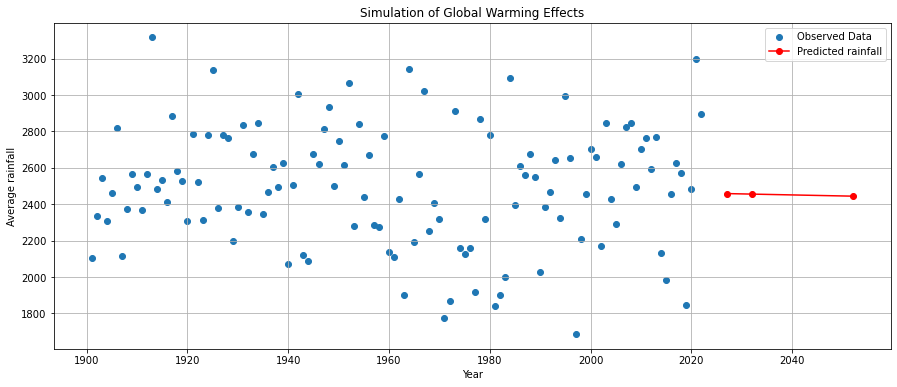

In [20]:
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['rainfall'], label='Observed Data')
plt.plot(future_years['Category'], predicted_rainfall, 'ro-', label='Predicted rainfall')
plt.xlabel('Year')
plt.ylabel('Average rainfall')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 84794.44219146777
Root Mean Squared Error: 291.1948526184276
Mean Absolute Error: 223.2138690011959
R-squared score: -0.0065177253230825904


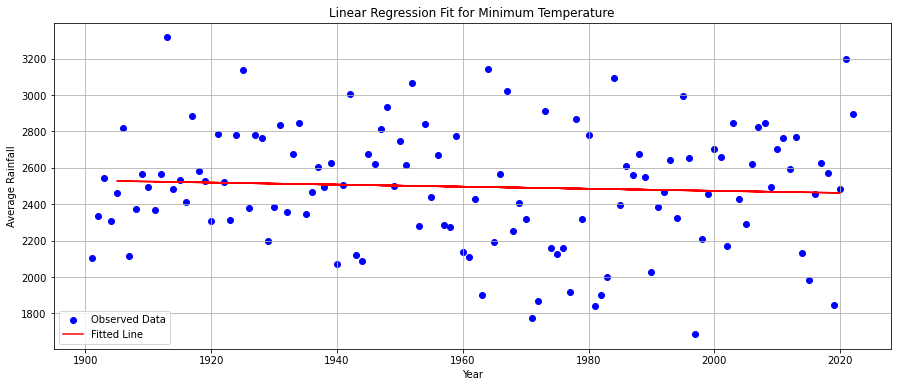

In [23]:
# Plot the original data and the fitted line
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], rainfall, label='Observed Data', color='blue')
plt.plot(X_test, y_pred, label='Fitted Line', color='red')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.title('Linear Regression Fit for Minimum Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

0.001747375427660014
Mean Squared Error: 84098.1458519368
Root Mean Squared Error: 289.99680317537434
Mean Absolute Error: 220.5606511462289
R-squared score: 0.001747375427660014


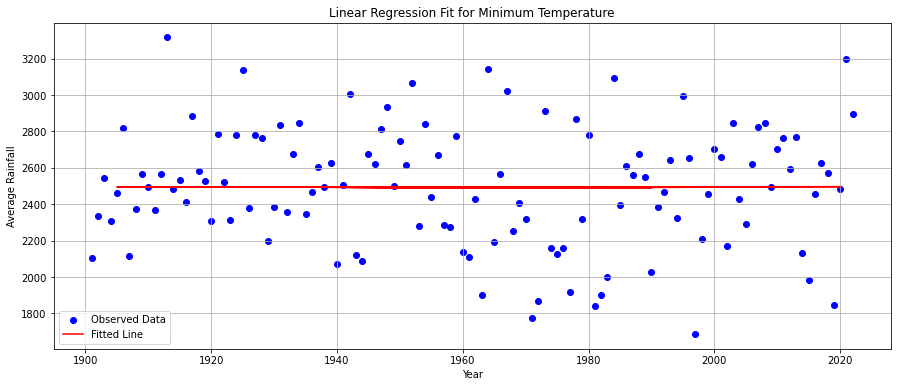

In [25]:
# Plot the original data and the fitted line
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], rainfall, label='Observed Data', color='blue')
plt.plot(X_test, y_pred, label='Fitted Line', color='red')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.title('Linear Regression Fit for Minimum Temperature')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\AN000\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


[2496.33946807 2496.13995897 2494.48422022]


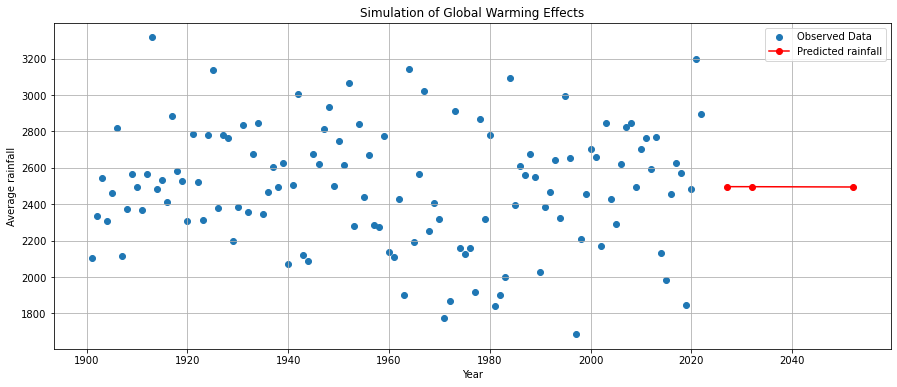

In [26]:
last_year = climate_df['Category'].max()
years_ahead = [last_year + 5, last_year + 10, last_year + 30]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_rainfall = svr_model.predict(future_years)
print(predicted_rainfall)
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['rainfall'], label='Observed Data')
plt.plot(future_years['Category'], predicted_rainfall, 'ro-', label='Predicted rainfall')
plt.xlabel('Year')
plt.ylabel('Average rainfall')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#maximum temperature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [28]:
years = climate_df['Category'].values.reshape(-1, 1)
temp_max = climate_df['temp_max'].values

In [29]:
#using 90-10 split
X_train, X_test, y_train, y_test = train_test_split(years, temp_max, test_size=0.3, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
last_year = climate_df['Category'].max()
years_ahead = [last_year + 5, last_year + 10, last_year + 30]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_temp_max = model.predict(future_years)

C:\Users\AN000\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


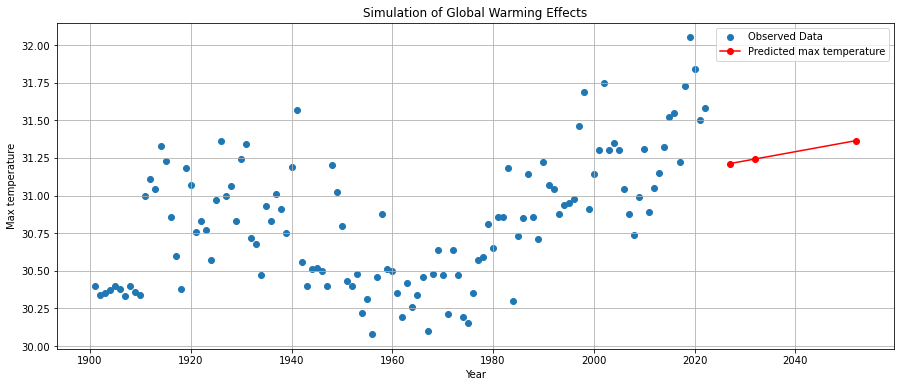

In [32]:
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_max'], label='Observed Data')
plt.plot(future_years['Category'], predicted_temp_max, 'ro-', label='Predicted max temperature')
plt.xlabel('Year')
plt.ylabel('Max temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 0.16950339308463117
Root Mean Squared Error: 0.4117078977681035
Mean Absolute Error: 0.34623614678849296
R-squared score: 0.037769562715739835


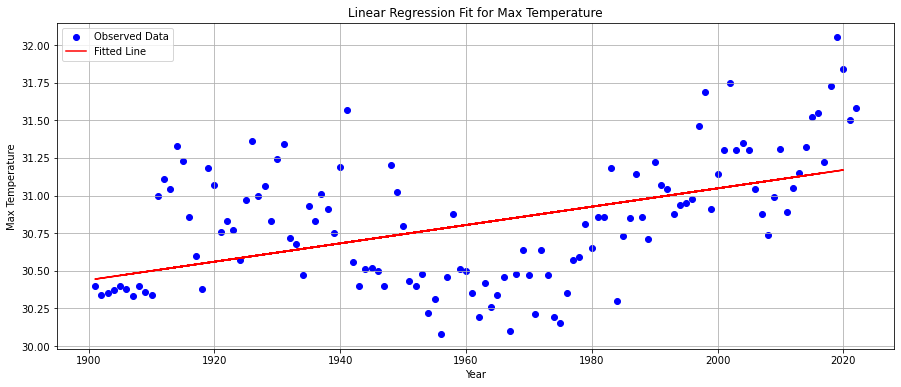

In [35]:
# Plot the original data and the fitted line
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], temp_max, label='Observed Data', color='blue')
plt.plot(X_test, y_pred, label='Fitted Line', color='red')
plt.xlabel('Year')
plt.ylabel('Max Temperature')
plt.title('Linear Regression Fit for Max Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=2.0, epsilon=0.2)

In [37]:
# Fit the model to the training data
svr_model.fit(X_train, y_train)

SVR(C=2.0, epsilon=0.2)

In [38]:
# Make predictions on the test data
y_pred = svr_model.predict(X_test)

In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

0.5136914570507383
Mean Squared Error: 0.08566653570904595
Root Mean Squared Error: 0.2926884618652501
Mean Absolute Error: 0.2246654556873762
R-squared score: 0.5136914570507383


[31.39093019 31.39494873 31.26058205]


C:\Users\AN000\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


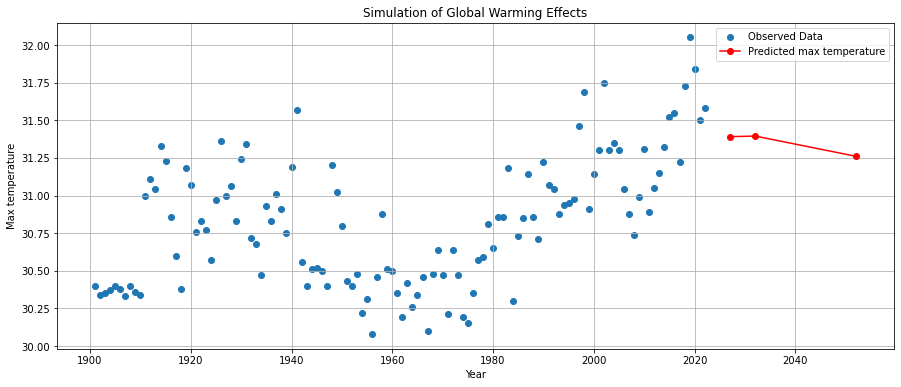

In [40]:
last_year = climate_df['Category'].max()
years_ahead = [last_year + 5, last_year + 10, last_year + 30]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_max_temp = svr_model.predict(future_years)
print(predicted_max_temp)
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_max'], label='Observed Data')
plt.plot(future_years['Category'], predicted_max_temp, 'ro-', label='Predicted max temperature')
plt.xlabel('Year')
plt.ylabel('Max temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

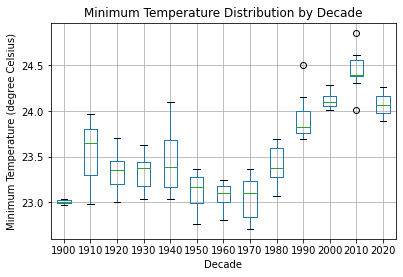

In [41]:
#Boxplot of rainfall by decade
climate_df['Decade'] = climate_df['Category'] // 10 * 10
plt.figure(figsize=(10, 6))
climate_df.boxplot(column='temp_min', by='Decade')
plt.title('Minimum Temperature Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Minimum Temperature (degree Celsius)')
plt.suptitle('')
plt.grid(True)
plt.show()

In [42]:
years = climate_df['Category'].values.reshape(-1, 1)
temp_min = climate_df['temp_min'].values

In [43]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [44]:
X_train, X_test, y_train, y_test = train_test_split(years, temp_min, test_size=0.1, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
last_year = climate_df['Category'].max()
years_ahead = [last_year + 5, last_year + 10, last_year + 30]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_temp_min = model.predict(future_years)

C:\Users\AN000\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


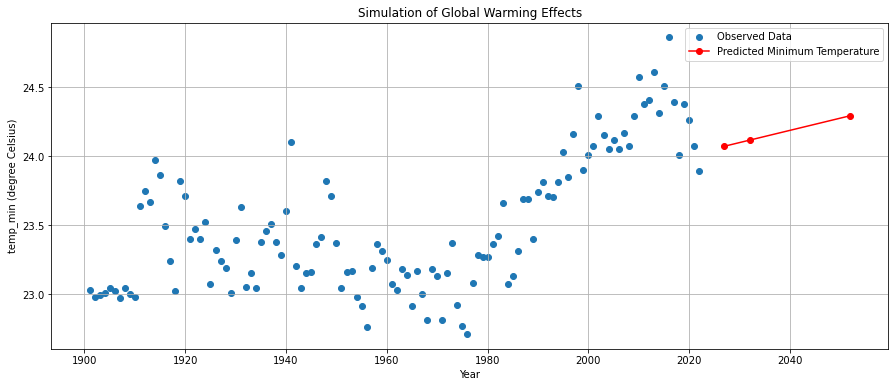

In [47]:
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_min'], label='Observed Data')
plt.plot(future_years['Category'], predicted_temp_min, 'ro-', label='Predicted Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('temp_min (degree Celsius)')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [49]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 0.197949509369963
Root Mean Squared Error: 0.44491517098202327
Mean Absolute Error: 0.3575977911062722
R-squared score: 0.10979241064190148


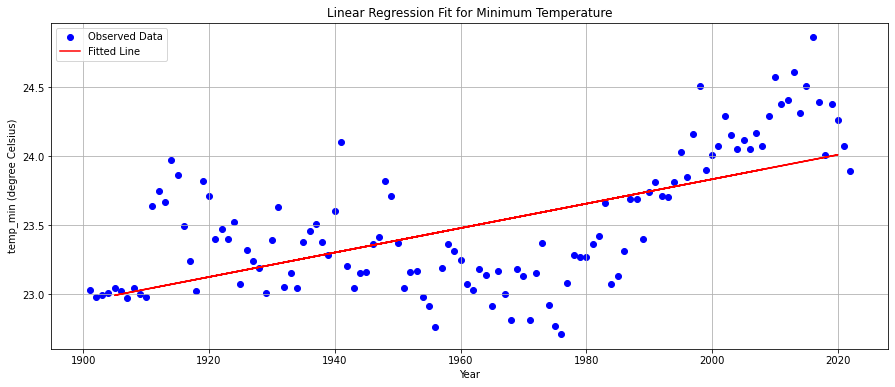

In [50]:
# Plot the original data and the fitted line
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], temp_min, label='Observed Data', color='blue')
plt.plot(X_test, y_pred, label='Fitted Line', color='red')
plt.xlabel('Year')
plt.ylabel('temp_min (degree Celsius)')
plt.title('Linear Regression Fit for Minimum Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

0.39774467517523304
Mean Squared Error: 0.13391948966698142
Root Mean Squared Error: 0.3659501190968264
Mean Absolute Error: 0.2967002623972945
R-squared score: 0.39774467517523304


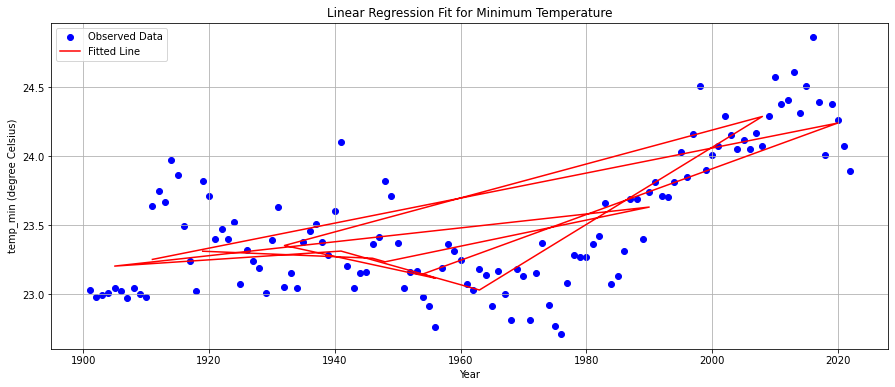

In [52]:
# Plot the original data and the fitted line
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], temp_min, label='Observed Data', color='blue')
plt.plot(X_test, y_pred, label='Fitted Line', color='red')
plt.xlabel('Year')
plt.ylabel('temp_min (degree Celsius)')
plt.title('Linear Regression Fit for Minimum Temperature')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\AN000\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


[24.05942446 23.90496246 23.45569713]


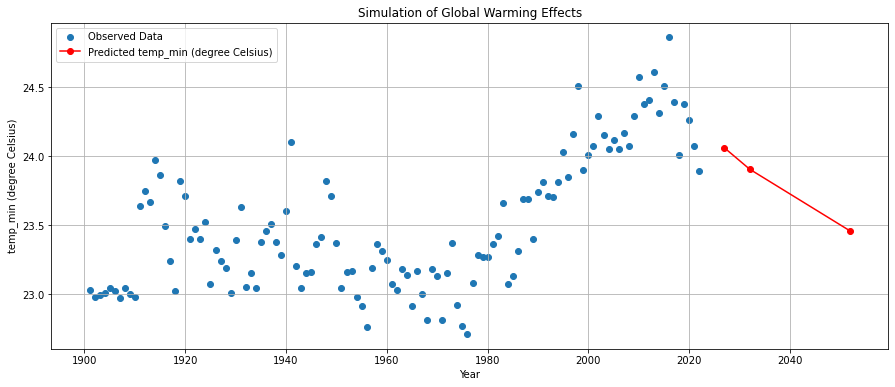

In [53]:
last_year = climate_df['Category'].max()
years_ahead = [last_year + 5, last_year + 10, last_year + 30]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_temp_min = svr_model.predict(future_years)
print(predicted_temp_min)
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_min'], label='Observed Data')
plt.plot(future_years['Category'], predicted_temp_min, 'ro-', label='Predicted temp_min (degree Celsius)')
plt.xlabel('Year')
plt.ylabel('temp_min (degree Celsius)')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

TIME BASED SPLITTING

TIME BASED SPLITTING - Maximum Temperature

In [54]:
train_start_year = 1901
test_start_year = 2010

train = climate_df.copy()[(climate_df.Category >= train_start_year) & (climate_df.Category < test_start_year)]
test = climate_df.copy()[climate_df.Category >= test_start_year]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)
print(train.columns)

Training data shape:  (109, 5)
Test data shape:  (13, 5)
Index(['Category', 'temp_min', 'temp_max', 'rainfall', 'Decade'], dtype='object')


In [55]:
X_train = train[['Category']]
y_train = train[['temp_max']]

X_test = test[['Category']]
y_test = test[['temp_max']]

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 0.35843753977606957
Root Mean Squared Error: 0.5986965339602941
Mean Absolute Error: 0.5178512221723242
R-squared score: -2.650956751055094


In [58]:
last_year = climate_df['Category'].max()
years_ahead = []
years_ahead = [last_year + 5, last_year + 10, last_year + 30]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_temp_max = model.predict(future_years)

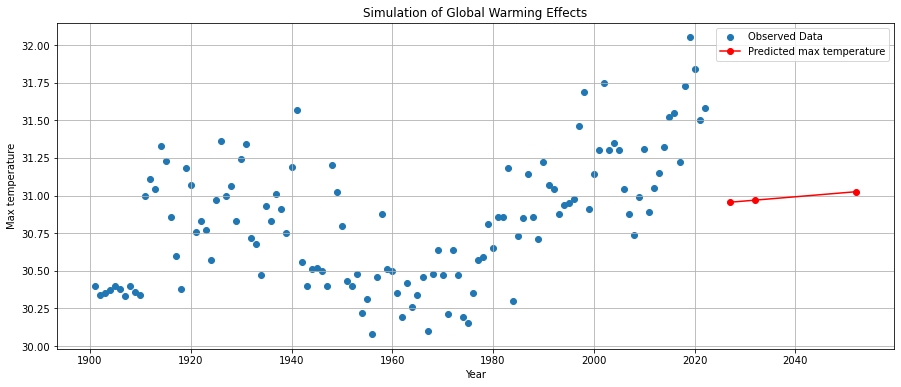

In [59]:
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_max'], label='Observed Data')
plt.plot(future_years['Category'], predicted_temp_max, 'ro-', label='Predicted max temperature')
plt.xlabel('Year')
plt.ylabel('Max temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
last_year = climate_df['Category'].max()
years_ahead = []
for x in range(30):
  years_ahead.append(last_year + x)
# years_ahead = [last_year + 10, last_year + 20, last_year + 30, last_year + 40,last_year + 50, last_year + 100, last_year + 200, last_year + 500]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_temp_max = model.predict(future_years)

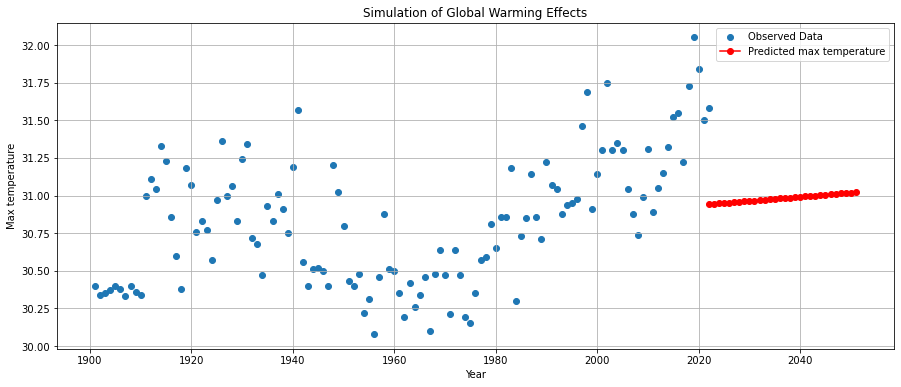

In [61]:
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_max'], label='Observed Data')
plt.plot(future_years['Category'], predicted_temp_max, 'ro-', label='Predicted max temperature')
plt.xlabel('Year')
plt.ylabel('Max temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

-2.6393975632593167
Mean Squared Error: 0.3573027011247679
Root Mean Squared Error: 0.597748024776969
Mean Absolute Error: 0.517484874592877
R-squared score: -2.6393975632593167


C:\Users\AN000\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [64]:
# Fit the model to the training data
svr_model.fit(X_train, y_train)

C:\Users\AN000\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [65]:
# Make predictions on the test data
y_pred = svr_model.predict(X_test)

In [66]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

-2.4817801630575524
Mean Squared Error: 0.3418284030143086
Root Mean Squared Error: 0.5846609299536857
Mean Absolute Error: 0.48527204777491495
R-squared score: -2.4817801630575524


[30.8722654  30.85361991 30.83530016 30.81740023 30.80000549 30.78319215
 30.76702711 30.75156778 30.73686214 30.7229488  30.70985725 30.69760814
 30.68621368 30.67567811 30.6659982  30.65716385 30.64915869 30.64196073
 30.63554302 30.62987435 30.62491987 30.62064182 30.61700009 30.61395291
 30.61145739 30.60947008 30.60794748 30.60684649 30.60612483 30.60574138]


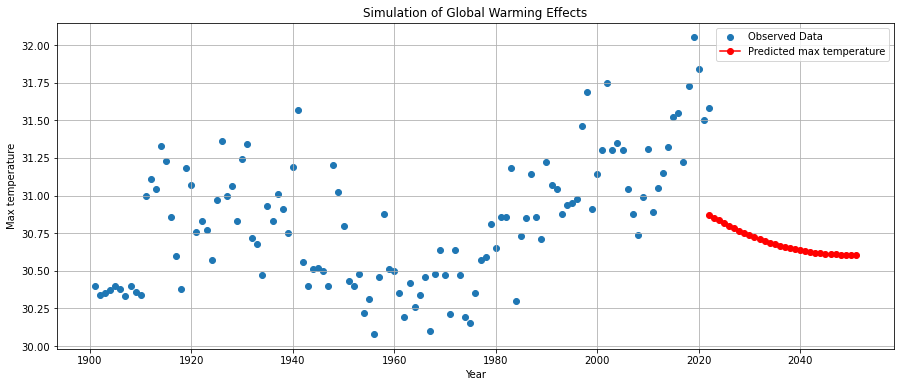

In [67]:
last_year = climate_df['Category'].max()
years_ahead = []
for x in range(30):
  years_ahead.append(last_year + x)
# years_ahead = [last_year + 5, last_year + 10, last_year + 15, last_year + 20,last_year + 25, last_year + 30,last_year + 100,last_year + 200]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_max_temp = svr_model.predict(future_years)
print(predicted_max_temp)
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_max'], label='Observed Data')
plt.plot(future_years['Category'], predicted_max_temp, 'ro-', label='Predicted max temperature')
plt.xlabel('Year')
plt.ylabel('Max temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

TIME BASED SPLITTING - Minimum Temperature

In [68]:
years = climate_df['Category'].values.reshape(-1, 1)
temp_min = climate_df['temp_min'].values

In [69]:
train_start_year = 1901
test_start_year = 2010

train = climate_df.copy()[(climate_df.Category >= train_start_year) & (climate_df.Category < test_start_year)]
test = climate_df.copy()[climate_df.Category >= test_start_year]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)
print(train.columns)

Training data shape:  (109, 5)
Test data shape:  (13, 5)
Index(['Category', 'temp_min', 'temp_max', 'rainfall', 'Decade'], dtype='object')


In [70]:
X_train = train[['Category']]
y_train = train[['temp_min']]

X_test = test[['Category']]
y_test = test[['temp_min']]


In [71]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)
b = model.intercept_
m = model.coef_[0]

[[0.00573413]] [12.19014225]


In [72]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 0.4396345432667567
Root Mean Squared Error: 0.6630494274688401
Mean Absolute Error: 0.6075433872956831
R-squared score: -5.9424628865709295


In [73]:
last_year = climate_df['Category'].max()
years_ahead = []
for x in range(30):
  years_ahead.append(last_year + x)
# years_ahead = [last_year + 10, last_year + 20, last_year + 30, last_year + 40,last_year + 50, last_year + 100, last_year + 200, last_year + 500]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_temp_min = model.predict(future_years)

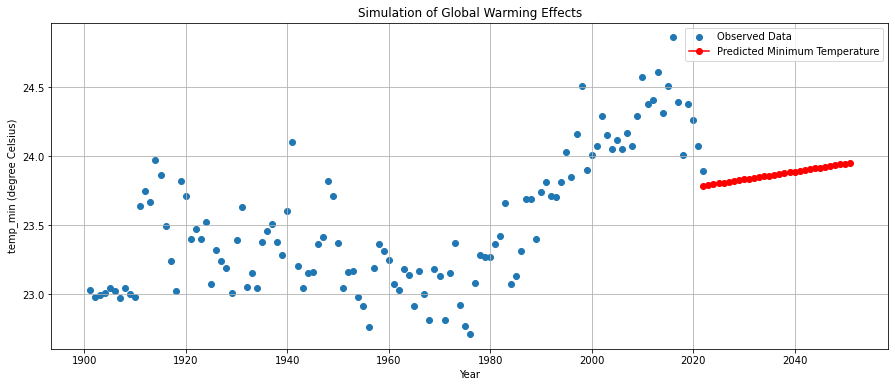

In [74]:
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_min'], label='Observed Data')
plt.plot(future_years['Category'], predicted_temp_min, 'ro-', label='Predicted Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('temp_min (degree Celsius)')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

C:\Users\AN000\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-5.627762129254589
Mean Squared Error: 0.4197059781496001
Root Mean Squared Error: 0.6478471873440527
Mean Absolute Error: 0.5902275188020074
R-squared score: -5.627762129254589


In [76]:
from sklearn.svm import SVR
svr_model_nonlinear = SVR(kernel='rbf', C=2.0, epsilon=0.2)

# Fit the model to the training data
svr_model_nonlinear.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model_nonlinear.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model_nonlinear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

-0.06523291568719825
Mean Squared Error: 0.06745634712239269
Root Mean Squared Error: 0.25972359754630053
Mean Absolute Error: 0.21346585707917007
R-squared score: -0.06523291568719825


C:\Users\AN000\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23.80549296 23.81183098 23.81816901 23.82450704 23.83084507 23.8371831
 23.84352113 23.84985916 23.85619719 23.86253522 23.86887323 23.87521127
 23.8815493  23.88788733 23.89422536 23.90056339 23.90690142 23.91323945
 23.91957746 23.92591549 23.93225352 23.93859155 23.94492958 23.95126761
 23.95760564 23.96394367 23.97028169 23.97661972 23.98295775 23.98929578]


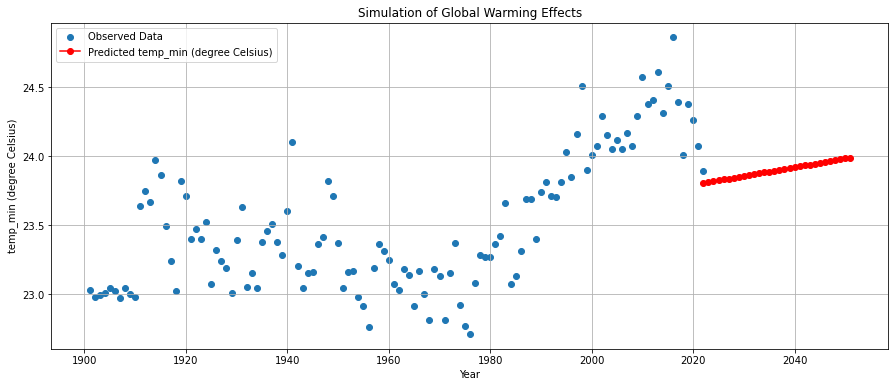

In [77]:
last_year = climate_df['Category'].max()
years_ahead = []
for x in range(30):
  years_ahead.append(last_year + x)
# years_ahead = [last_year + 5, last_year + 10, last_year + 15, last_year + 20,last_year + 25, last_year + 30,last_year + 100,last_year + 200]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_temp_min = svr_model.predict(future_years)
print(predicted_temp_min)
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['temp_min'], label='Observed Data')
plt.plot(future_years['Category'], predicted_temp_min, 'ro-',label='Predicted temp_min (degree Celsius)')
plt.xlabel('Year')
plt.ylabel('temp_min (degree Celsius)')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

TIME BASED SPLITTING - Rainfall

In [78]:
years = climate_df['Category'].values.reshape(-1, 1)
rainfall = climate_df['rainfall'].values

In [79]:
train_start_year = 1901
test_start_year = 2010

train = climate_df.copy()[(climate_df.Category >= train_start_year) & (climate_df.Category < test_start_year)]
test = climate_df.copy()[climate_df.Category >= test_start_year]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)
print(train.columns)

Training data shape:  (109, 5)
Test data shape:  (13, 5)
Index(['Category', 'temp_min', 'temp_max', 'rainfall', 'Decade'], dtype='object')


In [80]:
X_train = train[['Category']]
y_train = train[['rainfall']]

X_test = test[['Category']]
y_test = test[['rainfall']]

In [81]:
# X_train, X_test, y_train, y_test = train_test_split(years, rainfall, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 140704.22328644656
Root Mean Squared Error: 375.10561617556004
Mean Absolute Error: 315.73343695244625
R-squared score: -0.10245120126463436


In [83]:
last_year = climate_df['Category'].max()
years_ahead = []
for x in range(30):
  years_ahead.append(last_year + x)
# years_ahead = [last_year + 10, last_year + 20, last_year + 30, last_year + 40,last_year + 50, last_year + 100, last_year + 200, last_year + 500]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_rainfall = model.predict(future_years)

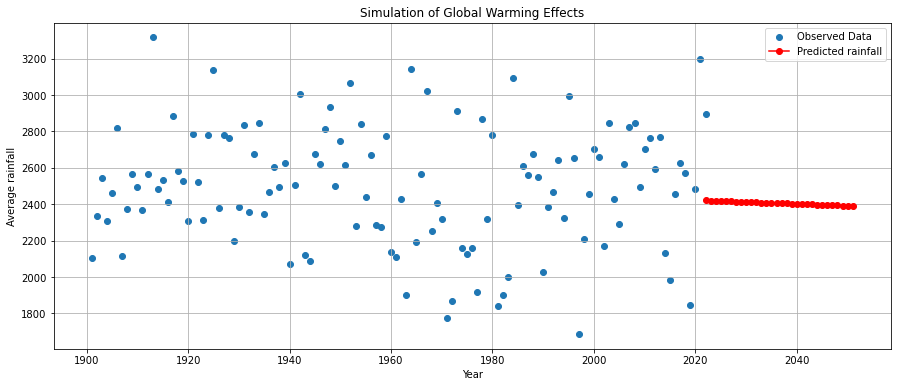

In [84]:
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['rainfall'], label='Observed Data')
plt.plot(future_years['Category'], predicted_rainfall, 'ro-', label='Predicted rainfall')
plt.xlabel('Year')
plt.ylabel('Average rainfall')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

-0.06231103516103298
Mean Squared Error: 135581.19299928518
Root Mean Squared Error: 368.2135155032813
Mean Absolute Error: 302.4126495735031
R-squared score: -0.06231103516103298


C:\Users\AN000\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2448.36777778 2447.83037037 2447.29296296 2446.75555555 2446.21814815
 2445.68074074 2445.14333333 2444.60592593 2444.06851852 2443.53111111
 2442.9937037  2442.4562963  2441.91888889 2441.38148148 2440.84407408
 2440.30666667 2439.76925926 2439.23185185 2438.69444444 2438.15703704
 2437.61962963 2437.08222222 2436.54481481 2436.00740741 2435.47
 2434.93259259 2434.39518519 2433.85777778 2433.32037037 2432.78296296]


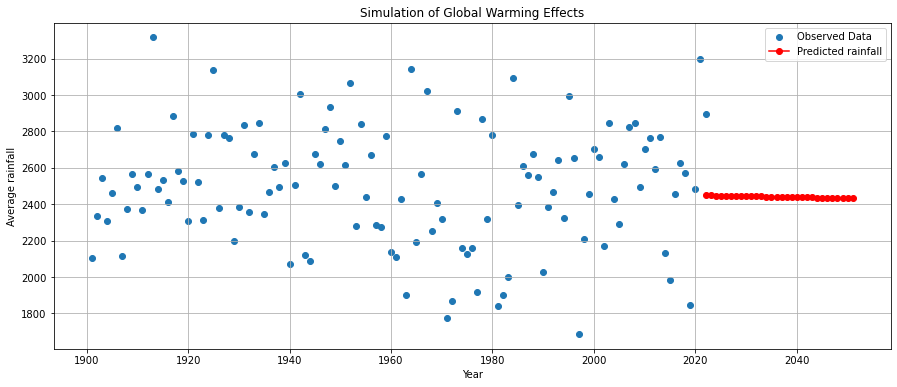

In [86]:
last_year = climate_df['Category'].max()
years_ahead = []
for x in range(30):
  years_ahead.append(last_year + x)
# years_ahead = [last_year + 5, last_year + 10, last_year + 15, last_year + 20,last_year + 25, last_year + 30,last_year + 100,last_year + 200]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_rainfall = svr_model.predict(future_years)
print(predicted_rainfall)
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['rainfall'], label='Observed Data')
plt.plot(future_years['Category'], predicted_rainfall, 'ro-', label='Predicted rainfall')
plt.xlabel('Year')
plt.ylabel('Average rainfall')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

-0.017214255358727115
Mean Squared Error: 129825.55740514315
Root Mean Squared Error: 360.31313798575695
Mean Absolute Error: 287.26448916347175
R-squared score: -0.017214255358727115


C:\Users\AN000\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2493.57031089 2493.58852604 2493.59894424 2493.60210183 2493.59854604
 2493.5888299  2493.57350746 2493.55312927 2493.52823825 2493.4993659
 2493.46702888 2493.43172599 2493.39393552 2493.35411299 2493.31268925
 2493.27006904 2493.22662977 2493.18272078 2493.13866285 2493.09474804
 2493.05123983 2493.00837347 2492.96635663 2492.92537022 2492.88556937
 2492.84708465 2492.81002332 2492.77447073 2492.74049182 2492.70813263]


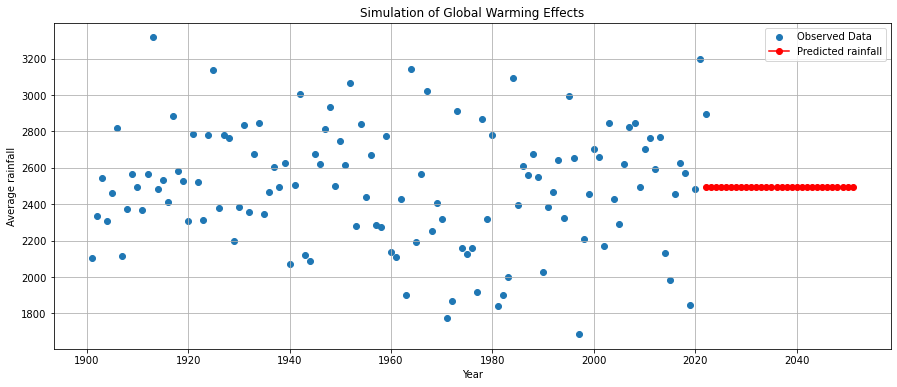

In [88]:
last_year = climate_df['Category'].max()
years_ahead = []
for x in range(30):
  years_ahead.append(last_year + x)
# years_ahead = [last_year + 5, last_year + 10, last_year + 15, last_year + 20,last_year + 25, last_year + 30,last_year + 100,last_year + 200]
future_years = pd.DataFrame({'Category': years_ahead})

predicted_rainfall = svr_model.predict(future_years)
print(predicted_rainfall)
plt.figure(figsize=(15, 6))
plt.scatter(climate_df['Category'], climate_df['rainfall'], label='Observed Data')
plt.plot(future_years['Category'], predicted_rainfall, 'ro-', label='Predicted rainfall')
plt.xlabel('Year')
plt.ylabel('Average rainfall')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

END